## 네이버 검색 API 사용해보기


* 검색기능 이용
* https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8 <br>
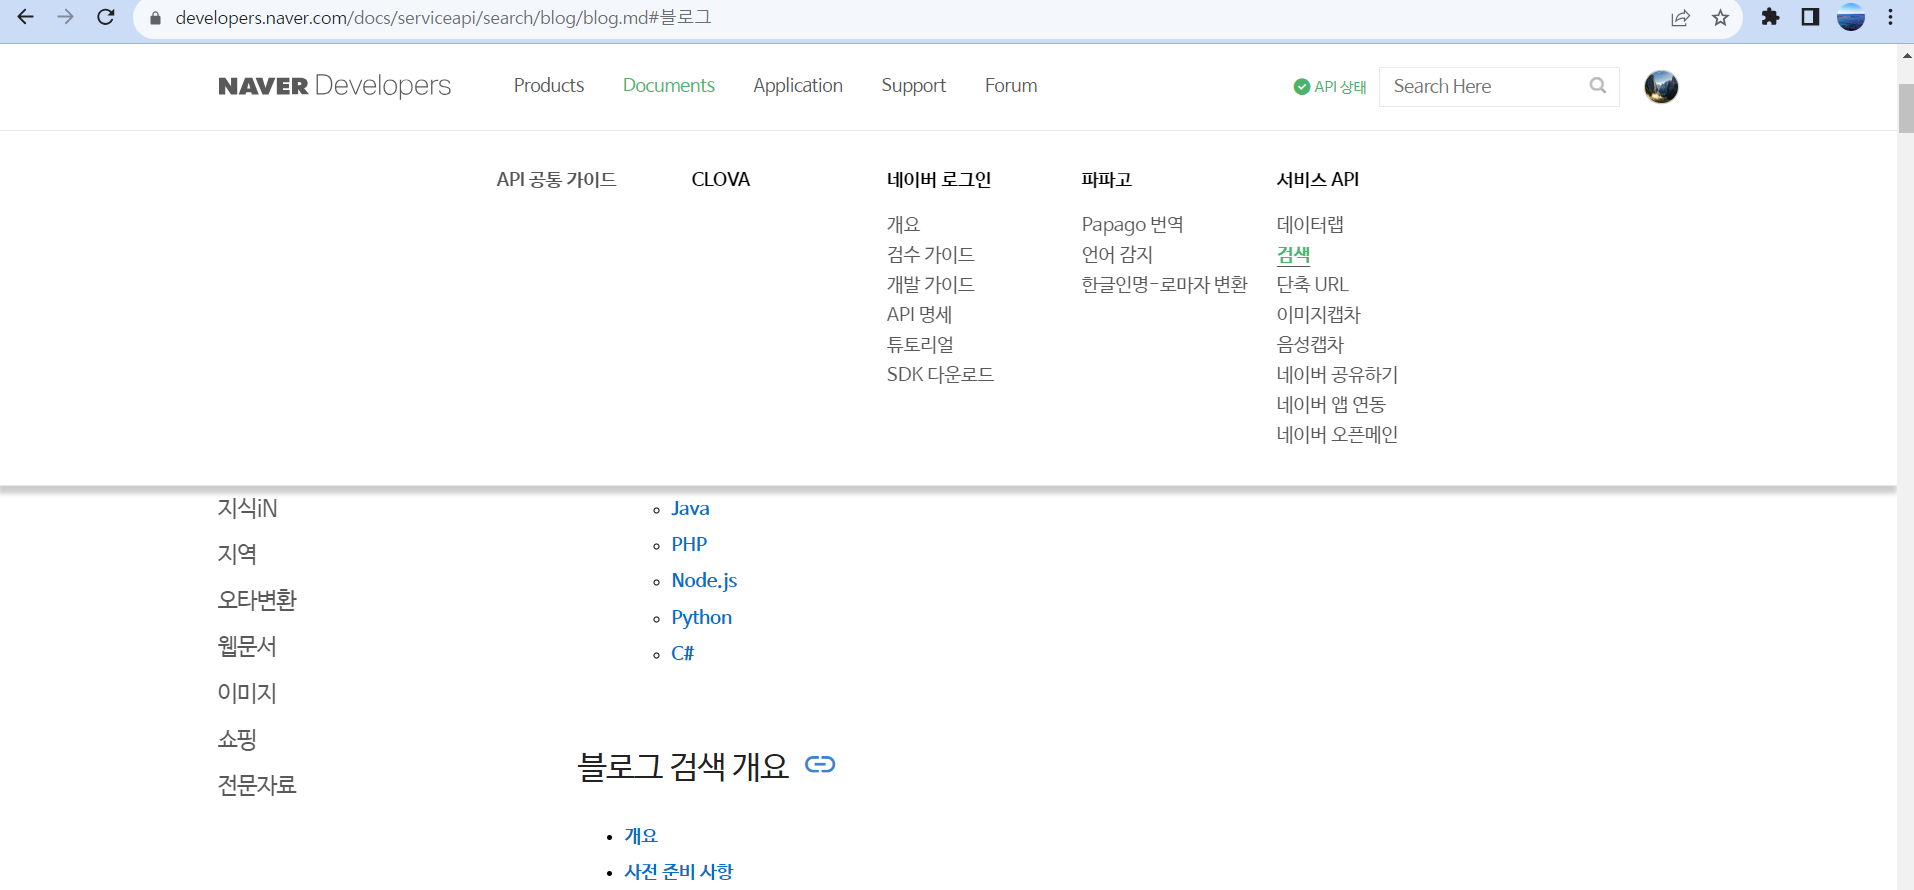

In [9]:
# urllib.request 모듈은 주어진 url을 이용해 웹에서 데이터를 얻어옴
import urllib.request
def create_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)

    return base + node + param_query + param_start + param_disp

In [53]:
import urllib.request
import json

client_id = "ztxaEBDa7ooscTczx5Py"
client_secret = "xnJru4nP4Z" 
    
url = create_url("book", "딥러닝", 1, 3)        # 딥러닝 검색하면 1에서 3까지(첫번째~세번째)의 값을 가져온다. 
    
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
    
response = urllib.request.urlopen(request)

result = json.loads(response.read().decode('utf-8'))
result

{'lastBuildDate': 'Fri, 18 Aug 2023 12:20:07 +0900',
 'total': 274,
 'start': 1,
 'display': 3,
 'items': [{'title': '컴퓨터 비전과 딥러닝',
   'link': 'https://search.shopping.naver.com/book/catalog/36975852621',
   'image': 'https://shopping-phinf.pstatic.net/main_3697585/36975852621.20230725120610.jpg',
   'author': '오일석',
   'discount': '35100',
   'publisher': '한빛아카데미',
   'pubdate': '20230105',
   'isbn': '9791156645481',
   'description': 'OpenCV와 텐서플로를 활용한 85개 파이썬 프로그램으로 배우는 컴퓨터 비전\n\n① 이론과 실습으로 균형 있게 배우는 컴퓨터 비전\n고전 방법과 딥러닝 방법으로 컴퓨터 비전 이론을 배우고 85개 파이썬 프로그램 실습으로 구현 방법을 직접 확인할 수 있습니다.\n\n② 딥러닝 중심의 컴퓨터 비전 교재\n딥러닝 중심으로 컴퓨터 비전을 소개하지만 영상 처리, 고전 컴퓨터 비전까지 모두 다루므로 컴퓨터 비전을 제대로 공부할 수 있습니다.\n\n③ [온라인 부록]으로 기초 지식 다지기\n파이썬 기본, 선형대수와 확률 이론 기초를 온라인 부록으로 제공하여 컴퓨터 비전을 공부하는 데 필요한 기초 지식을 빠르게 습득할 수 있습니다.\n\n* 본 도서는 대학 강의용 교재로 개발되었으므로 연습문제 해답은 제공하지 않습니다.'},
  {'title': '딥러닝',
   'link': 'https://search.shopping.naver.com/book/catalog/32473661766',
   'image': 'https://shopping-phinf.pstatic.net/main_3247366/

In [54]:
titles = authors = [result['items'][n]['title'] for n in range(3)]
titles

['컴퓨터 비전과 딥러닝', '딥러닝', '밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현)']

In [55]:
authors = [result['items'][n]['author'] for n in range(3)]
authors

['오일석', '박혜정^석경하^심주용^황창하', '사이토 고키']

In [56]:
pubdates = [result['items'][n]['pubdate'] for n in range(3)]
pubdates

['20230105', '20180630', '20170103']

In [57]:
import pandas as pd
pd.DataFrame({'책제목':titles, '작가':authors, '출판일':pubdates})

,책제목,작가,출판일
0,컴퓨터 비전과 딥러닝,오일석,20230105
1,딥러닝,박혜정^석경하^심주용^황창하,20180630
2,밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현),사이토 고키,20170103


In [58]:
def get_dataframe(url):
    client_id = "ztxaEBDa7ooscTczx5Py"
    client_secret = "xnJru4nP4Z"
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urllib.request.urlopen(request)

    result = json.loads(response.read().decode('utf-8'))
    
    end_num = result['display']
    
    titles = [result['items'][n]['title'] for n in range(end_num)]
    authors = [result['items'][n]['author'] for n in range(end_num)]
    pubdates = [result['items'][n]['pubdate'] for n in range(end_num)]
    
    return pd.DataFrame({'책제목':titles, '작가':authors, '출판일':pubdates})

In [59]:
get_dataframe(url)

,책제목,작가,출판일
0,컴퓨터 비전과 딥러닝,오일석,20230105
1,딥러닝,박혜정^석경하^심주용^황창하,20180630
2,밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현),사이토 고키,20170103


In [60]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")    # 공백으로 처리
    input_str = input_str.replace("</b>", "")
    return input_str

In [61]:
def get_dataframe(url):
    client_id = "ztxaEBDa7ooscTczx5Py"
    client_secret = "xnJru4nP4Z"
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urllib.request.urlopen(request)

    result = json.loads(response.read().decode('utf-8'))
    
    end_num = result['display']
    
    titles = [delete_tag(result['items'][n]['title']) for n in range(end_num)]
    authors = [result['items'][n]['author'] for n in range(end_num)]
    pubdates = [result['items'][n]['pubdate'] for n in range(end_num)]

    return pd.DataFrame({'책제목':titles, '작가':authors, '출판일':pubdates})

In [62]:
get_dataframe(url)

,책제목,작가,출판일
0,컴퓨터 비전과 딥러닝,오일석,20230105
1,딥러닝,박혜정^석경하^심주용^황창하,20180630
2,밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현),사이토 고키,20170103


In [63]:
result_search = []

for n in range(1,400,100):
    url = create_url("book", "딥러닝", n, 100)
    result_search.append(get_dataframe(url))
    
result_search = pd.concat(result_search)

In [64]:
result_search.head()

,책제목,작가,출판일
0,컴퓨터 비전과 딥러닝,오일석,20230105
1,딥러닝,박혜정^석경하^심주용^황창하,20180630
2,밑바닥부터 시작하는 딥러닝 (파이썬으로 익히는 딥러닝 이론과 구현),사이토 고키,20170103
3,혼자 공부하는 머신러닝+딥러닝 (구글 코랩으로 환경 설정 없이 실습 가능),박해선,20201221
4,밑바닥부터 시작하는 딥러닝 2 (파이썬으로 직접 구현하며 배우는 순환 신경망과 자연...,사이토 고키,20190501


In [65]:
result_search.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 73
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   책제목     274 non-null    object
 1   작가      274 non-null    object
 2   출판일     274 non-null    object
dtypes: object(3)
memory usage: 8.6+ KB


In [66]:
result_search = result_search.reset_index(drop=True)
result_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   책제목     274 non-null    object
 1   작가      274 non-null    object
 2   출판일     274 non-null    object
dtypes: object(3)
memory usage: 6.5+ KB


## 엑셀에 저장하기

In [51]:
!pip install xlsxwriter

In [52]:
writer = pd.ExcelWriter("../data/DL_book_info1.xlsx", engine='xlsxwriter')
result_search.to_excel(writer, sheet_name='Sheet1')

workbook  = writer.book
worksheet = writer.sheets['Sheet1']

format_center = workbook.add_format({'text_wrap': True})
format_center.set_align('center')
format_center.set_align('vcenter')

worksheet.set_column('A:A', 5)
worksheet.set_column('B:B', 90, format_center)
worksheet.set_column('C:C', 40, format_center)
worksheet.set_column('D:D', 15)

writer.save()